In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os
print(os.path.dirname(pd.__file__))

C:\Users\arupm\anaconda3\envs\PythonData\lib\site-packages\pandas


# Reflect Tables into SQLAlchemy ORM (Only run this part if you'd like to try SqlAlchemy)

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [ ]:
# View all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# using the sqlite3 command to repeat what has been done above

In [3]:

import sqlite3 as sql
from flask import Flask, jsonify
import itables
print(os.path.dirname(sql.__file__))

C:\Users\arupm\anaconda3\envs\PythonData\lib\sqlite3


In [4]:
!pip install itables

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [6]:
# reading the measurement table
with sql.connect("C:/Users/arupm/Desktop/bootcamp/Homeworks/sqlalchemy-challenge/Starter_Code/Resources/hawaii.sqlite") as con:
        cur = con.cursor()
        colnames_measurement=cur.execute("select * from measurement")
        rows_measurement = cur.fetchall()
        print(f"info of the measurement table {colnames_measurement.description} ")
        
        cur2 = con.cursor()
        colnames_station=cur2.execute("select * from station")
        rows_station = cur2.fetchall()
        print(f"info of the station table {colnames_station.description} ")
        

con.close()

np.arange(len(rows_measurement))

np.arange(len(rows_station))

info of the measurement table (('id', None, None, None, None, None, None), ('station', None, None, None, None, None, None), ('date', None, None, None, None, None, None), ('prcp', None, None, None, None, None, None), ('tobs', None, None, None, None, None, None)) 
info of the station table (('id', None, None, None, None, None, None), ('station', None, None, None, None, None, None), ('name', None, None, None, None, None, None), ('latitude', None, None, None, None, None, None), ('longitude', None, None, None, None, None, None), ('elevation', None, None, None, None, None, None)) 


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
df_dic=[]
for j in np.arange(len(rows_measurement)):
    temp={colnames_measurement.description[0][0]:rows_measurement[j][0],
    colnames_measurement.description[1][0]:rows_measurement[j][1],
    colnames_measurement.description[2][0]:rows_measurement[j][2],
    colnames_measurement.description[3][0]:rows_measurement[j][3],
    colnames_measurement.description[4][0]:rows_measurement[j][4]}
    df_dic.append(temp)

In [8]:
measurement=pd.DataFrame(df_dic)
measurement

id      station        date  prcp  tobs
0          1  USC00519397  2010-01-01  0.08  65.0
1          2  USC00519397  2010-01-02  0.00  63.0
2          3  USC00519397  2010-01-03  0.00  74.0
3          4  USC00519397  2010-01-04  0.00  76.0
4          5  USC00519397  2010-01-06   NaN  73.0
...      ...          ...         ...   ...   ...
19545  19546  USC00516128  2017-08-19  0.09  71.0
19546  19547  USC00516128  2017-08-20   NaN  78.0
19547  19548  USC00516128  2017-08-21  0.56  76.0
19548  19549  USC00516128  2017-08-22  0.50  76.0
19549  19550  USC00516128  2017-08-23  0.45  76.0

[19550 rows x 5 columns]

In [9]:
df_dic=[]
for j in np.arange(len(rows_station)):
    temp={colnames_station.description[0][0]:rows_station[j][0],
    colnames_station.description[1][0]:rows_station[j][1],
    colnames_station.description[2][0]:rows_station[j][2],
    colnames_station.description[3][0]:rows_station[j][3],
    colnames_station.description[4][0]:rows_station[j][4],
    colnames_station.description[5][0]:rows_station[j][5]}
    df_dic.append(temp)

In [10]:
station=pd.DataFrame(df_dic)
station

id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5   6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6   7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7   8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8   9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  
1 -157.80150       14.6  
2 -157.83740        7.0  
3 -157.97510       11.9  
4 -158.01110      306.6  
5 -157.71139       19.5  
6 -157.84889       32.9  
7 -157.99920        0.9  
8 -157.80250      152.4

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the measurement data set.
measurement["Date"]=pd.to_datetime(measurement["date"])
most_recent_date = measurement.sort_values("Date", ascending=False)
recent_year=most_recent_date.iloc[[0],4]
recent_year

# most_recent_date = session.query(func.max(Measurement.date)).first()
# most_recent_date

19549    76.0
Name: tobs, dtype: float64

In [12]:
Prev_Year= (most_recent_date.iloc[[0],5]- dt.timedelta(days=365))
Prev_Year

19549   2016-08-23
Name: Date, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date', ylabel='Precipitation'>

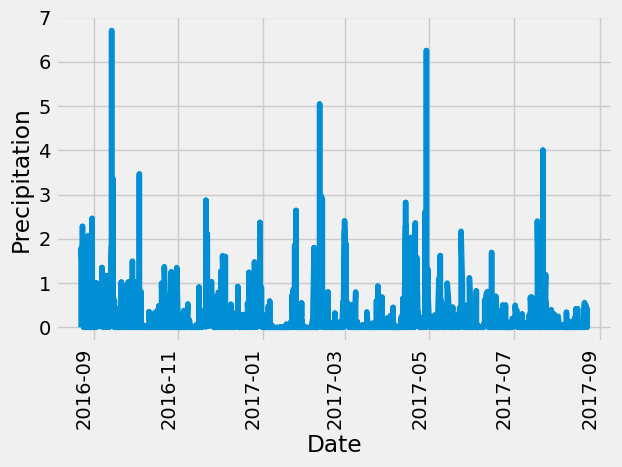

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12_months=measurement[(measurement.loc[:,"Date"]>="2016-08-23") & (measurement.loc[:,"Date"]<="2017-08-23")]

#Please noticed 
last_12_months_plot=last_12_months[["Date","prcp"]].dropna().reset_index(drop=True).set_index("Date")
last_12_months_plot

# # Calculate the date one year from the last date in data set.
# # prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# # # Perform a query to retrieve the data and precipitation scores
# # results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


last_12_months_plot.plot(kind="line", ylabel="Precipitation", legend=False, rot=90)


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary=pd.DataFrame()
no_NA=measurement.dropna(how="all")
no_NA
summary["min"]=no_NA.groupby("Date")["prcp"].mean()
summary["mean"]=no_NA.groupby("Date")["prcp"].mean()
summary["max"]=no_NA.groupby("Date")["prcp"].mean()
summary["variance"]=no_NA.groupby("Date")["prcp"].var()
summary["std"]=no_NA.groupby("Date")["prcp"].std()
summary

min      mean       max  variance       std
Date                                                        
2010-01-01  0.151429  0.151429  0.151429  0.005914  0.076904
2010-01-02  0.002857  0.002857  0.002857  0.000057  0.007559
2010-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2010-01-04  0.001429  0.001429  0.001429  0.000014  0.003780
2010-01-05  0.005000  0.005000  0.005000  0.000070  0.008367
...              ...       ...       ...       ...       ...
2017-08-19  0.030000  0.030000  0.030000  0.002700  0.051962
2017-08-20  0.005000  0.005000  0.005000  0.000050  0.007071
2017-08-21  0.193333  0.193333  0.193333  0.100933  0.317700
2017-08-22  0.166667  0.166667  0.166667  0.083333  0.288675
2017-08-23  0.132500  0.132500  0.132500  0.046225  0.215000

[2792 rows x 5 columns]

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
count_station=len(station.groupby("station")["station"].count())
f"Total number of stations in the database is {count_station}."

#session.query(func.count(Station.station)).all()

'Total number of stations in the database is 9.'

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_station=pd.DataFrame(measurement.groupby("station")["station"].count().sort_values(ascending=False)).\
rename(columns={"station":"count_station"}).reset_index()
most_active_station.iloc[[0],:]

# session.query(Measurement.station, func.count(Measurement.station)).\
#     group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station  count_station
0  USC00519281           2772

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_T= measurement[measurement["station"]=='USC00519281']["tobs"].min()
max_T= measurement[measurement["station"]=='USC00519281']["tobs"].max()
mean_T= measurement[measurement["station"]=='USC00519281']["tobs"].mean()

print(f" The lowest temp is {min_T} the highest temp  is {max_T}, and the average temp is {mean_T}")
# session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
#     filter(Measurement.station == 'USC00519281').all()

 The lowest temp is 54.0 the highest temp  is 85.0, and the average temp is 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

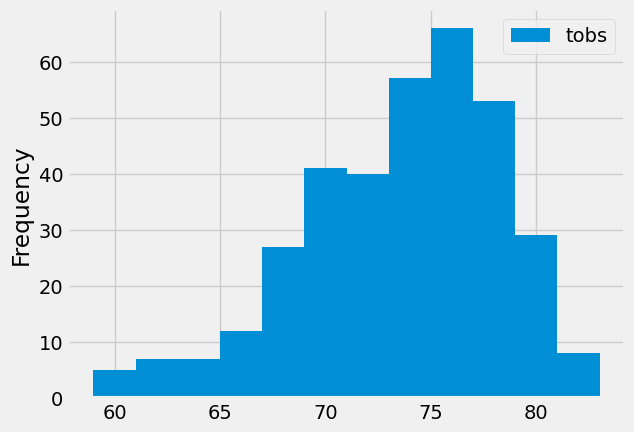

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_USC00519281=measurement[ (measurement.loc[:,"station"]=='USC00519281') & (measurement.loc[:,"Date"]>="2016-08-23") & (measurement.loc[:,"Date"]<="2017-08-23")]
last_12_months_USC00519281=last_12_months_USC00519281[["Date", "tobs"]].set_index("Date")
last_12_months_USC00519281
# import datetime as dt
# from pandas.plotting import table
# prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# results = session.query(Measurement.tobs).\
#     filter(Measurement.station == 'USC00519281').\
#     filter(Measurement.date >= prev_year).all()

# PLOT THE RESULTS AS A HISTOGRAM

last_12_months_USC00519281.plot(kind="hist", xlabel="Temperature", bins=12)


# Close session

In [ ]:
# Close Session
#session.close()